# Diyabet Tahmini

## Import Libraries

In [1]:
import pandas as pd      #Pandas is a dataframe library
import matplotlib.pyplot as plt #matplotlib.pyplot plots data
import numpy as np              #numpy for scientific computing

#do plotting inline instead of a seperate window 

%matplotlib inline

## Import Data

In [2]:
#find current working directory

import os
cwd=os.getcwd()
print (cwd)

/Users/omer


In [3]:
df = pd.read_csv("./Desktop/pima-data.csv")

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
df.shape

(768, 10)

In [7]:
df.sample(n=3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
137,0,93,60,25,92,28.7,0.532,22,0.9850,False
445,0,180,78,63,14,59.4,2.420,25,2.4822,True
364,4,147,74,25,293,34.9,0.385,30,0.9850,False


In [8]:
df.sample(frac=0.01)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
451,2,134,70,0,0,28.9,0.542,23,0.0000,True
29,5,117,92,0,0,34.1,0.337,38,0.0000,False
576,6,108,44,20,130,24.0,0.813,35,0.7880,False
57,0,100,88,60,110,46.8,0.962,31,2.3640,False
482,4,85,58,22,49,27.8,0.306,28,0.8668,False
262,4,95,70,32,0,32.1,0.612,24,1.2608,False
312,2,155,74,17,96,26.6,0.433,27,0.6698,True
605,1,124,60,32,0,35.8,0.514,21,1.2608,False


## Features Description

|Feature|Description	|Comments|
|--------|--------------|------
|num_preg	|number of pregnancies|
|glucose_conc|	Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|diastolic_bp|	Diastolic blood pressure (mm Hg)|
|thickness	|Triceps skin fold thickness (mm)|
|insulin	|2-Hour serum insulin (mu U/ml)|
|bmi	|Body mass index (weight in kg/(height in m)^2)|
|diab_pred	|Diabetes pedigree function|
|Age (years)	|Age (years)|
|skin	|????	|What is this?|
|diabetes	|Class variable (1=True, 0=False)	|Why is our data boolean (True/False)?|

#### Generally we want to remove any column we dont need

## Feature Selection

##### Columns to eliminate
* Correlated Columns
   - Same value, different format 
       - (ID and value Associated with ID)
* Add little information
* Confuse alghorithm 
    - Some alghorithms treat every column as independent
    
    SO
    
    ### BIAS is introduced!!
    
for eg. Price = x* Area (sqft) + y* Area (mtsq) + room count

Area is twice important!!
     
   
    

## Check Null Values

In [9]:
df.isnull().values.any()

False

## Check for correlations

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## Visualize

In [11]:
print((df.corr().columns))

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')


In [12]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


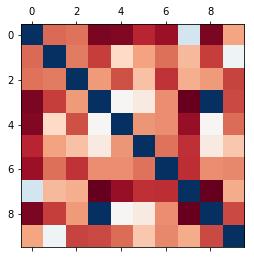

In [13]:
plt.matshow(df.corr(),cmap=plt.cm.RdBu)

In [14]:
def plot_corr (df,size=11):
    corr=df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    cax = ax.matshow(corr, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=17) #draw xticks
    plt.yticks(range(len(corr.columns)),corr.columns) #draw yticks

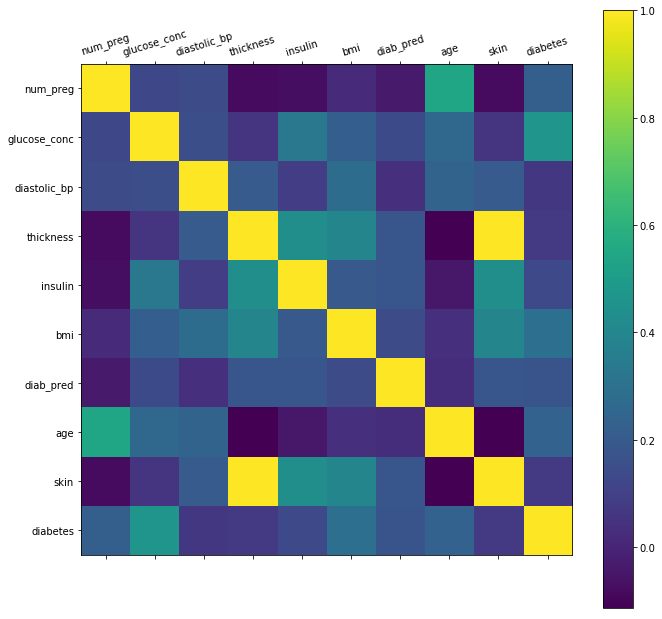

In [15]:
plot_corr(df)

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


## Delete correlated columns
### (or do not use two columns together)

In [17]:
del df["skin"]

In [18]:
df.sample(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
737,8,65,72,23,0,32.0,0.600,42,False
625,4,90,88,47,54,37.7,0.362,29,False
640,0,102,86,17,105,29.3,0.695,27,False
122,2,107,74,30,100,33.6,0.404,23,False
147,2,106,64,35,119,30.5,1.400,34,False


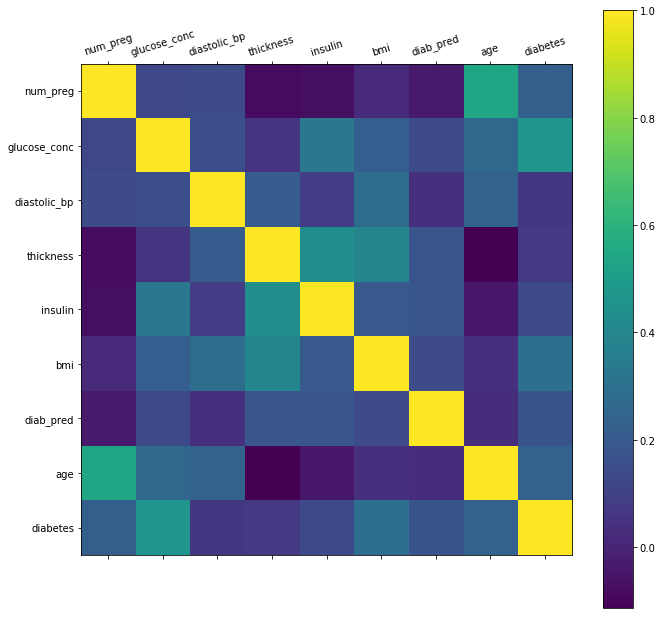

In [19]:
plot_corr(df)

## Check Data types

In [20]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Change logical to integer

### True to 1 , False to 0

In [21]:
diabetes_map = {True : 1, False : 0}

In [22]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [23]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data is ready for model

### Data rule: accurately predicting rare events are difficult.
#### Check for the distribution

In [24]:
num_true=len(df.loc[df['diabetes']==True])
num_false=len(df.loc[df['diabetes']==False])
print("Total num of true = {0} (%{1:2.2f})".format(num_true,num_true/(num_true+num_false)*100))
print("Total num of false = {0} (%{1:2.2f})".format(num_false,num_false/(num_true+num_false)*100))

Total num of true = 268 (%34.90)
Total num of false = 500 (%65.10)


Seems Good Distribution of true and false. No Special Work needed

## Splitting Data

%70 Training %30 Test

In [25]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

## Depreceated cross_validation. use model_selection

In [26]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age']
predicted_class_names =['diabetes']

X=df[feature_col_names].values       #matrix 8 x m
y=df[predicted_class_names].values   #vector 1 x m

split_test_size=0.30

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=split_test_size,random_state=42)







/Users/omer/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## NEW library

In [27]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'i nsulin',
       'bmi', 'diab_pred', 'age']
predicted_class_names =['diabetes']

X=df[feature_col_names].values       #matrix 8 x m
y=df[predicted_class_names].values   #vector 1 x m

split_test_size=0.30

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=split_test_size,random_state=42)


## Is the split really 70/30?


Lets check

In [28]:
print("Training Data : {0:2.2f}%".format(len(X_train)/len(df)*100))
print("Test Data : {0:2.2f}%".format(len(X_test)/len(df)*100))

Training Data : 69.92%
Test Data : 30.08%


### Verify Train and Test are split correctly

In [29]:
print("Original True : ", len(df.loc[df['diabetes']==1]))
print("Original False: ",len(df.loc[df['diabetes']==0]))

print ("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:]==1]),len(y_train[y_train[:]==1])/len(y_train)*100))
print ("Training False: ", len(y_train[y_train[:]==0]))

print ("\nTest True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:]==1]),len(y_test[y_test[:]==1])/len(y_test)*100))
print ("Test False: ", len(y_test[y_test[:]==0]))





Original True :  268
Original False:  500
Training True: 188 (35.01%)
Training False:  349

Test True: 80 (34.63%)
Test False:  151


## Post Data Preperation

##### Check for hidden values
Sometimes Null values can not be seen
or 0 values can be set where it should not be

In [30]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Can Thickness be zero ????

### Are 0 values possible?

In [31]:
len(df.loc[df['num_preg']==0])

111

In [32]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [33]:
for column in df.columns:
    print("Number of zeroes in {1:12} :  {0:>4}".format(len(df.loc[df[column]==0]),column))

Number of zeroes in num_preg     :   111
Number of zeroes in glucose_conc :     5
Number of zeroes in diastolic_bp :    35
Number of zeroes in thickness    :   227
Number of zeroes in insulin      :   374
Number of zeroes in bmi          :    11
Number of zeroes in diab_pred    :     0
Number of zeroes in age          :     0
Number of zeroes in diabetes     :   500


## Deal with zeroes by replacing with mean

In [34]:
from sklearn.preprocessing import Imputer

In [35]:
X_train[45]

array([   1.   ,  107.   ,   68.   ,   19.   ,    0.   ,   26.5  ,
          0.165,   24.   ])

In [36]:
fill_0 = Imputer(missing_values=0,strategy='mean',axis=0)
#axis=0 column, axis=1 row

X_train=fill_0.fit_transform(X_train)
X_test=fill_0.fit_transform(X_test)


In [37]:
X_train[45]

array([   1.        ,  107.        ,   68.        ,   19.        ,
        155.33333333,   26.5       ,    0.165     ,   24.        ])

## Training Initial Alghtorithm Naive Bayes

There are multiple Naive bayes Implementations 
* We will use GaussianNB wigh indicates values are distributen in gaussian curve, near the mean

## train data formating
####Data must be formatted in a way for an array to give into the predictoin alghorithm
###### - use ravel to convert array of vectors to an array

In [38]:
y_train

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [39]:
y_train.ravel()

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1,

In [40]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()

nb_model.fit(X_train,y_train.ravel())

GaussianNB(priors=None)

## Performance on  Training Data

In [41]:
#predict on training Data

nb_predict_train = nb_model.predict(X_train)

#import performance metrics library

from sklearn import metrics

print("Accuracy : {0:2.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))

Accuracy : 0.7542


## Performance on Test Data

In [42]:
nb_predict_test = nb_model.predict(X_test)

print("Accuracy : {0:2.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy : 0.7359


### Is it ok??

## Metrics Detail

### Confusion Matrix

In [43]:
conf_mx=metrics.confusion_matrix(y_test,nb_predict_test,labels=[1,0])

In [44]:
print (conf_mx)

[[ 52  28]
 [ 33 118]]


Columns are predicted values
Rows are 

|   -         | Predicted True | Predicted false |
|   -        |----------------|-----------------|
|**Actual True**|True Posivite(TP)|False Positive (FP)|
|**Actual False**|False Negative(FN)|True Negative(TN)|


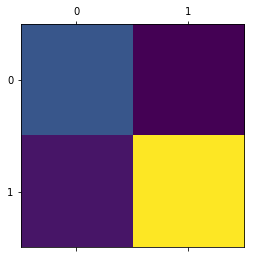

In [45]:
from matplotlib import pyplot
pyplot.matshow(conf_mx)


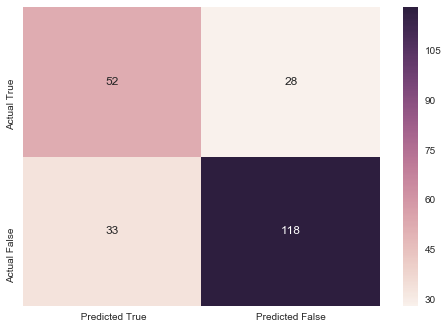

In [46]:
import seaborn as sn

cmatrix=sn.heatmap(conf_mx,
                   annot=True,
                   fmt='d',
                   xticklabels=[" Predicted True","Predicted False"],
                   yticklabels=["Actual True","Actual False"])


### Classification Report

In [47]:
!pwd

/Users/omer


## What would be the perfect classifier?

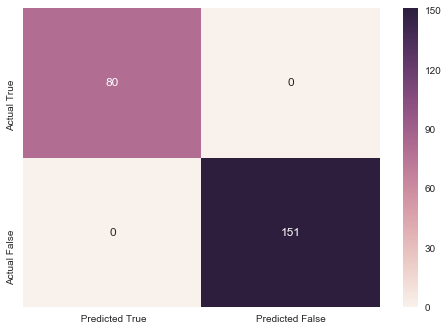

In [48]:
perfect = [[80,0],[0,151]]
cmatrix=sn.heatmap(perfect,
                   annot=True,
                   fmt='d',
                   xticklabels=[" Predicted True","Predicted False"],
                   yticklabels=["Actual True","Actual False"])



## Some detailed data about classification accuracy

In [49]:
print(metrics.classification_report(y_test,nb_predict_test,labels=[True,False]))

             precision    recall  f1-score   support

       True       0.61      0.65      0.63        80
      False       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



### recall= probability of correct prediction if actual result is true

0.65 ?? not so good

Improvement is needed

## Lets try random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [51]:
rf_predict_train = rf_model.predict(X_train)
print (metrics.accuracy_score(y_train,rf_predict_train))

0.98696461825


## Is it possible such accuracy?

## Predict test data

In [52]:
rf_predict_test = rf_model.predict(X_test)

print (metrics.accuracy_score(y_test,rf_predict_test))
print (metrics.confusion_matrix(y_test,rf_predict_test))

0.709956709957
[[121  30]
 [ 37  43]]


### Something is happening. lets check details

In [53]:
print (metrics.classification_report(y_test,rf_predict_test,labels=[True,False]))

             precision    recall  f1-score   support

       True       0.59      0.54      0.56        80
      False       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



## if difference is too big between test and train 

## OVERFIT!!!

### Lets try Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7,random_state=42)

lr_model.fit (X_train, y_train.ravel())

lr_predict_test = lr_model.predict(X_test)

print(metrics.confusion_matrix(y_test,lr_predict_test))

print (metrics.classification_report(y_test,lr_predict_test,labels=[True,False]))

[[128  23]
 [ 36  44]]
             precision    recall  f1-score   support

       True       0.66      0.55      0.60        80
      False       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



### We guessed regularization parameter. 

#### is there a way to find the regularization hyperparameter for maximum score?

### Loop

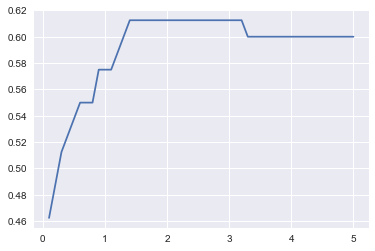

In [56]:
C_start= 0.1
C_end=5
C_inc=0.1

C_values, recall_scores = [], []

C_val=C_start

best_recall_score = 0

while C_val < C_end:
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val,random_state=42)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    if ( recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val=C_val+C_inc


%matplotlib inline 

plt.plot(C_values,recall_scores,"-")





## Still not achieved target

## Maybe it is unbalanced??


set class_weigth='balanced'

0.30000000000000004


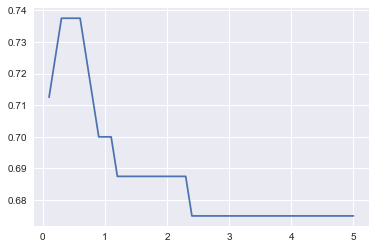

In [61]:
C_start= 0.1
C_end=5
C_inc=0.1

C_values, recall_scores = [], []

C_val=C_start

best_recall_score = 0

while C_val < C_end:
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val,class_weight='balanced',random_state=42)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    if ( recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val=C_val+C_inc

best_C_value = C_values[recall_scores.index(best_recall_score)]
print (best_C_value)

%matplotlib inline 

plt.plot(C_values,recall_scores,"-")

### Now try with best regularization parameter and balanced logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=best_C_value,class_weight='balanced',random_state=42)

lr_model.fit (X_train, y_train.ravel())

lr_predict_test = lr_model.predict(X_test)

print(metrics.confusion_matrix(y_test,lr_predict_test))

print (metrics.classification_report(y_test,lr_predict_test,labels=[True,False]))

[[106  45]
 [ 21  59]]
             precision    recall  f1-score   support

       True       0.57      0.74      0.64        80
      False       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



## Logistic RegressionCV

(gonnabe worse but will perform better in ral world)

Logistic regression with Cross-validation

In [64]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1,random_state=42,Cs=3,cv=10,refit=True,class_weight="balanced")

lr_cv_model.fit(X_train,y_train.ravel())



LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Check performance

In [65]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print(metrics.confusion_matrix(y_test,lr_cv_predict_test))

print (metrics.classification_report(y_test,lr_cv_predict_test,labels=[True,False]))



[[107  44]
 [ 29  51]]
             precision    recall  f1-score   support

       True       0.54      0.64      0.58        80
      False       0.79      0.71      0.75       151

avg / total       0.70      0.68      0.69       231



Ensemble alghorithms have lots of powerful parameters


like CS number of loops for each fold

In [1]:
%qtconsole